<a href="https://colab.research.google.com/github/safwanshamsir99/NielsenIQ-Data-Science-Assessment/blob/main/NielsenIQ_Data_Science_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from datetime import date

today = date.today()
formatted_date = today.strftime("%d-%m-%Y").replace("-0", "-")
print("Today's date:", formatted_date)

Today's date: 14-7-2024


## Data Loading

In [3]:
import pandas as pd
import numpy as np

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
PATH = '/content/drive/MyDrive/Wages.csv'

df = pd.read_csv(PATH)
df.head(3)

,rownames,exp,wks,bluecol,ind,south,smsa,married,sex,union,ed,black,lwage
0,1,3,32,no,0,yes,no,yes,male,no,9,no,5.56068
1,2,4,43,no,0,yes,no,yes,male,no,9,no,5.72031
2,3,5,40,no,0,yes,no,yes,male,no,9,no,5.99645


### Information

- **exp**: Years of full-time work experience.
- **wks**: Weeks worked.
- **bluecol**: Blue collar (yes/no).
- **ind**: Works in a manufacturing industry (yes/no).
- **south**: Resides in the south (yes/no).
- **smsa**: Resides in a standard metropolitan statistical area (yes/no).
- **married**: Married (yes/no).
- **sex**: A factor with levels "male" and "female."
- **union**: Individual's wage set by a union contract (yes/no).
- **ed**: Years of education.
- **black**: Is the individual black (yes/no).
- **lwage**: Logarithm of wage.


In [5]:
df.drop(columns='rownames', axis=1, inplace=True)
df.head(3)

,exp,wks,bluecol,ind,south,smsa,married,sex,union,ed,black,lwage
0,3,32,no,0,yes,no,yes,male,no,9,no,5.56068
1,4,43,no,0,yes,no,yes,male,no,9,no,5.72031
2,5,40,no,0,yes,no,yes,male,no,9,no,5.99645


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4165 entries, 0 to 4164
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   exp      4165 non-null   int64  
 1   wks      4165 non-null   int64  
 2   bluecol  4165 non-null   object 
 3   ind      4165 non-null   int64  
 4   south    4165 non-null   object 
 5   smsa     4165 non-null   object 
 6   married  4165 non-null   object 
 7   sex      4165 non-null   object 
 8   union    4165 non-null   object 
 9   ed       4165 non-null   int64  
 10  black    4165 non-null   object 
 11  lwage    4165 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 390.6+ KB


In [7]:
for i in df.columns:
  print(df[i].value_counts())
  print("")
  print("")

exp
9     173
10    172
11    170
8     168
12    165
13    158
7     151
14    146
15    139
16    138
6     121
17    114
18    109
31    104
30     99
5      98
19     97
20     96
32     95
33     93
21     92
27     92
28     92
29     92
26     91
25     90
34     90
35     86
22     85
24     84
23     83
36     81
4      72
37     70
38     57
3      53
39     50
40     48
41     35
42     25
43     19
2      18
44     13
45     11
46      9
1       8
47      3
48      3
49      3
50      3
51      1
Name: count, dtype: int64


wks
49    815
50    745
48    669
47    451
51    276
46    230
52    138
45    121
44    100
39     69
40     67
43     65
36     62
42     59
38     55
41     49
37     40
35     27
30     19
34     15
32     13
28     10
25      8
26      7
29      7
33      6
22      5
27      5
24      5
21      4
31      4
23      3
12      3
6       3
15      2
17      2
20      2
5       1
11      1
16      1
8       1
Name: count, dtype: int64


bluecol
yes    2

## Question 1
Highlight three descriptive facts from the data with supporting analysis and graphs.

In [8]:
df.columns

Index(['exp', 'wks', 'bluecol', 'ind', 'south', 'smsa', 'married', 'sex',
       'union', 'ed', 'black', 'lwage'],
      dtype='object')

In [9]:
con_columns = ['exp', 'wks', 'ed', 'lwage']

cat_columns = []
for i in df.columns:
    if i not in con_columns:
        cat_columns.append(i)

print(f"Continuous variable: {con_columns}")
print(f"Discrete variable: {cat_columns}")

Continuous variable: ['exp', 'wks', 'ed', 'lwage']
Discrete variable: ['bluecol', 'ind', 'south', 'smsa', 'married', 'sex', 'union', 'black']


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_con(df, continuous_col):
  '''
  This function is to generate plots for continuous columns

  Parameters
  ----------
  df : pd.DataFrame
      pandas DataFrame.
  continuous_col : list[str]
      List of the column names of the DataFrame

  Returns
  -------
  matplotlib.pyplot Figure.

  '''
  for j in continuous_col:
      plt.figure()
      sns.distplot(df[j])
      plt.show()

def plot_cat(df, categorical_col):
  '''
  This function is to generate plots for categorical columns

  Parameters
  ----------
  df : pd.DataFrame
      pandas DataFrame.
  categorical_col : list[str]
      List of the column names of the DataFrame

  Returns
  -------
  matplotlib.pyplot Figure.

  '''
  for j in categorical_col:
      plt.figure()
      sns.countplot(df[j])
      plt.show()

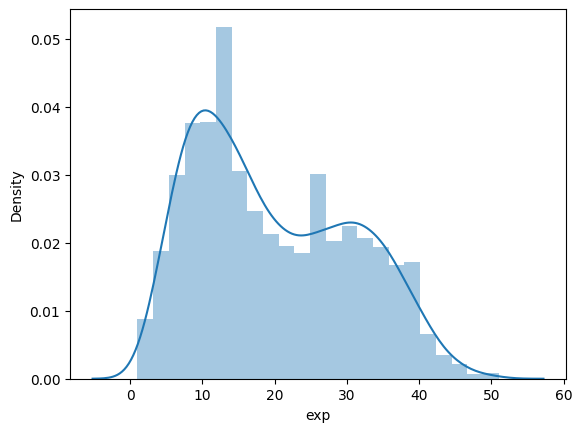

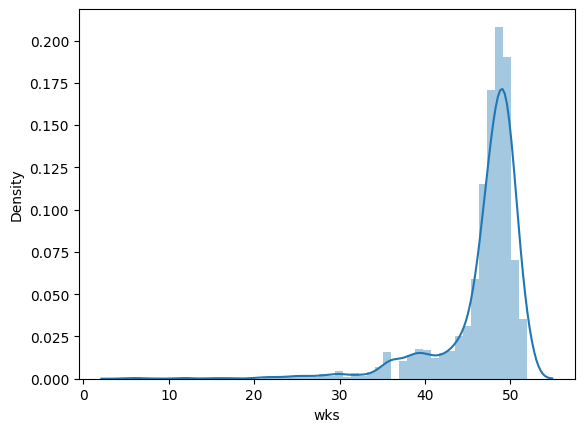

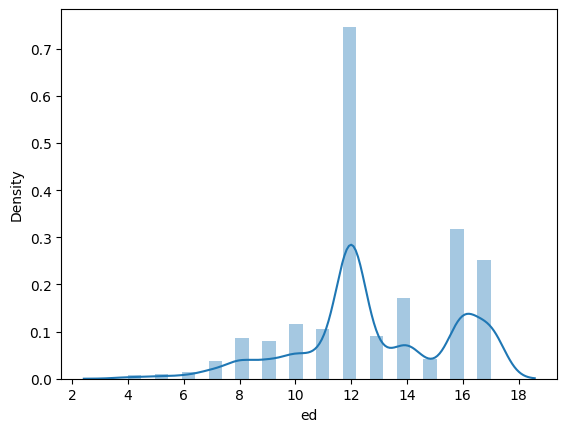

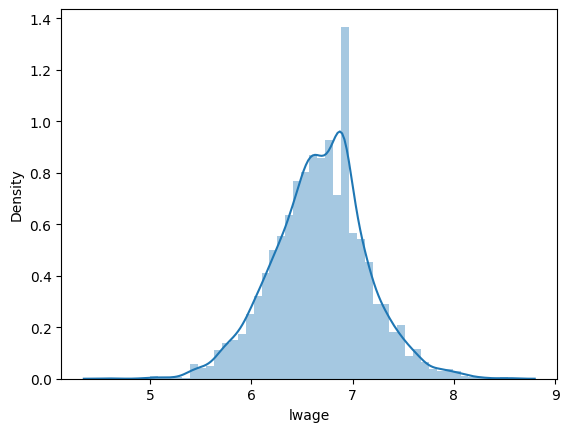

In [13]:
plot_con(df, con_columns)

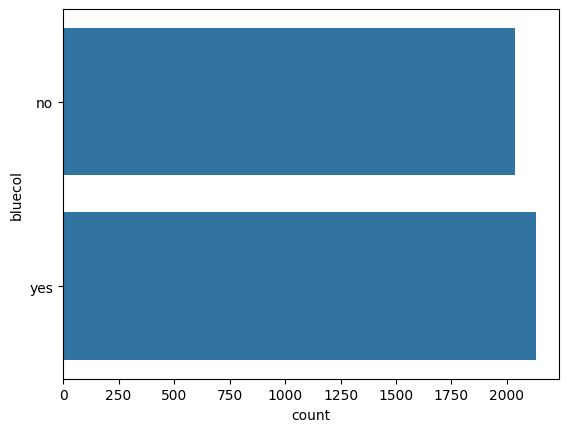

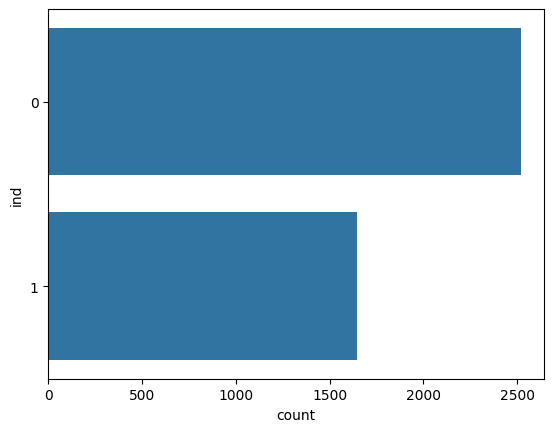

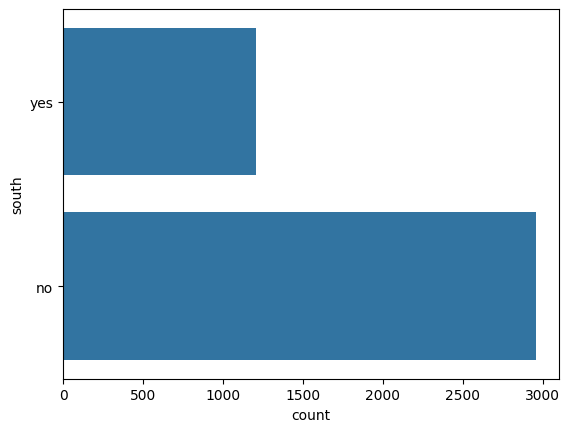

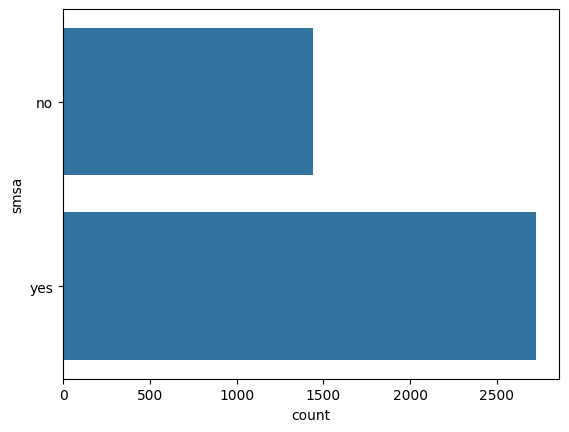

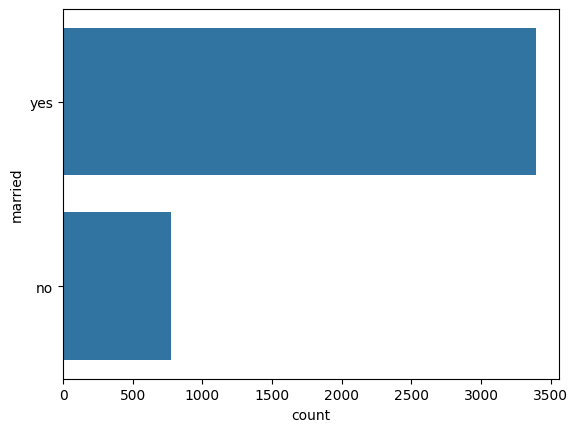

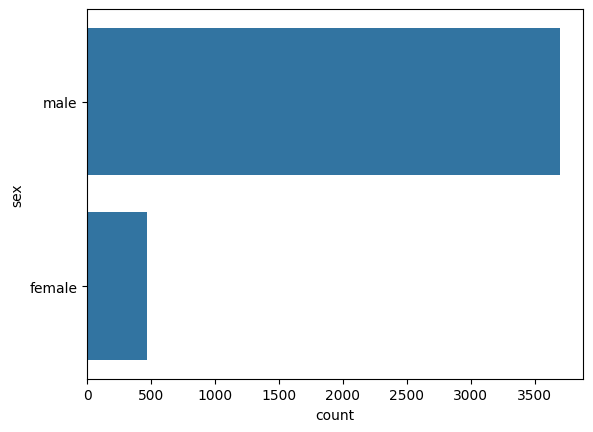

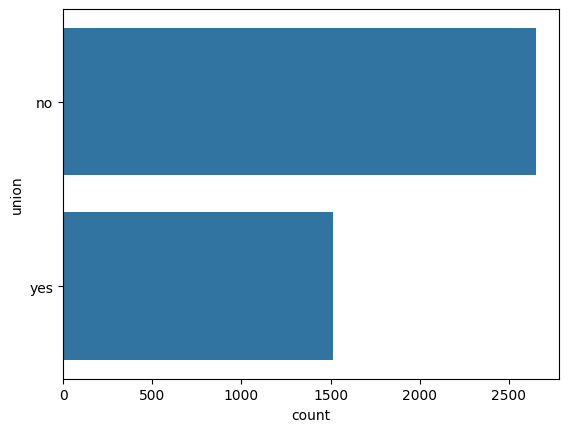

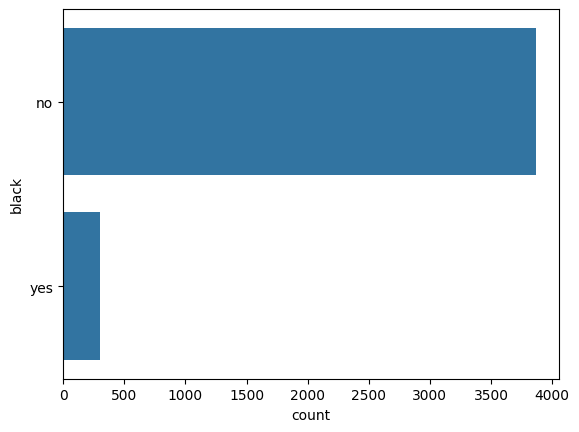

In [14]:
df['ind'] = df['ind'].astype(str)
plot_cat(df, cat_columns)

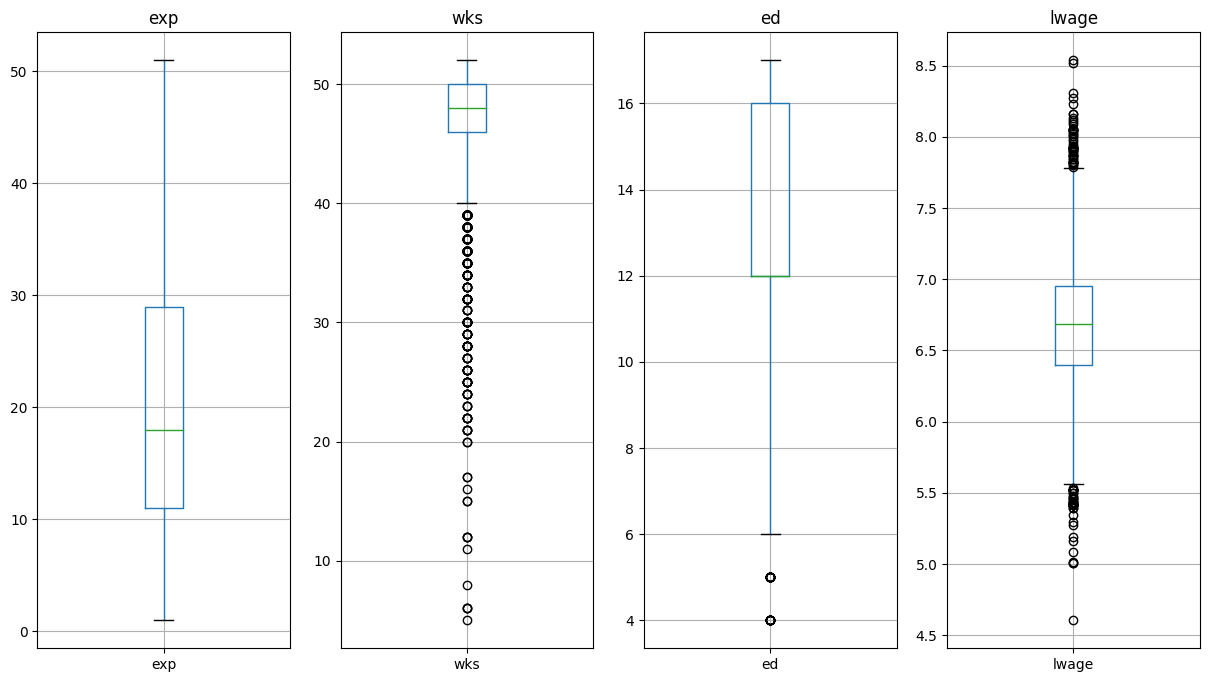

In [15]:
import matplotlib.pyplot as plt

con_df = df[con_columns]

# Inspect the columns by using boxplot
fig, axs = plt.subplots(1, 4, figsize=(15, 8))
axs = axs.flatten()
for ax, out in zip(axs,con_columns):
  con_df.boxplot(column=out,ax=ax)
  ax.set_title(out)
plt.show()

Three descriptive facts from the data with supporting analysis and
graphs.
1. There are 2 type of variables; 8 categorical variables (dichotomous) and 4 continuous variables.  
2. All of the categorical variables are imbalance data
3. There are a lot of outliers in the `wks`, `ed`, and `lwage` columns. Only `exp` column does not have outlier.



## Question 2
Pick a continuous variable of interest, what is the distribution of this variable?

**Answer:**

- Continuous variable of interest: `lwage` (Logarithm of wage)
- The distribution of `lwage` appears slightly right-skewed.
- The median of `lwage` is closer to the first quartile than to the third quartile, suggesting that more than half of the values lie below this median value.
- There are also a lot of outliers which is normal for any wage value since it can go in range of 0 and above. The outliers on the higher end indicate some variation from the typical range of values.

## Question 3
Continuing from above, how would you examine and clean outlier?

**Answer:**
- I will examine the outlier by visualizing the statistical summary using boxplot() function. I also can visualize the outlier using distribution plot (.distplot())
- To clean the outlier, the simplest method are removing outliers by using:
  1.   InterQuantile Range (IQR)
  2.   Standard Deviation

  There are also other ways to deal with outliers such as by using algorithms. However, since the distribution of `lwage` data is following the bell curve, it is more suitable to remove the outlier using Standard Deviation.

In [16]:
# Identify the upper limit and lower limit to remove the outlier using Standard Deviation
def calc_limits_SD(df:pd.DataFrame, column:str)->tuple[int, int]:
    mean = df[column].mean()
    std_dev = df[column].std()
    upper_bound = mean + 3*std_dev
    lower_bound = mean - 3*std_dev
    return lower_bound, upper_bound

In [17]:
lower_bound_SD, upper_bound_SD = calc_limits_SD(df, 'lwage')

lower_bound_SD, upper_bound_SD

(5.291809832031511, 8.060882969889256)

In [18]:
df_cleaned = df[(df['lwage'] <= upper_bound_SD) & (df['lwage'] >= lower_bound_SD)]
print(f"Total initial row: {df.shape[0]}")
print(f"Total final row after data cleaning: {df_cleaned.shape[0]}")
print(f"Total removed row: {df.shape[0] - df_cleaned.shape[0]}")

Total initial row: 4165
Total final row after data cleaning: 4146
Total removed row: 19


## Question 4
Build an assumption from data and prove it.

**Answer:**
- Assumption: Years of work experience (`exp`) has correlation with wages (`lwage`)
- Proof:

In [19]:
correlation = df_cleaned['exp'].corr(df_cleaned['lwage'])
print(f"Pearson's correlation coefficient (r) between 'exp' and 'lwage': {correlation:.4f}")

Pearson's correlation coefficient (r) between 'exp' and 'lwage': 0.2230


It shows that years of experience `exp` and wages `lwage` has a correlation for about 0.2093

## Question 5
Build a model from data, share with us the insights and results.

In [20]:
import os
import pickle
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for cat in cat_columns:
  df_cleaned[cat] = le.fit_transform(df_cleaned[cat])
  os.makedirs('file_encoder', exist_ok=True)
  save_path = os.path.join(os.getcwd(),'file_encoder')
  LE_PATH = os.path.join(save_path, f'le_{cat}.pkl')
  with open(LE_PATH,'wb') as file:
    pickle.dump(le,file)

In [21]:
df_cleaned

,exp,wks,bluecol,ind,south,smsa,married,sex,union,ed,black,lwage
0,3,32,0,0,1,0,1,1,0,9,0,5.56068
1,4,43,0,0,1,0,1,1,0,9,0,5.72031
2,5,40,0,0,1,0,1,1,0,9,0,5.99645
3,6,39,0,0,1,0,1,1,0,9,0,5.99645
4,7,42,0,1,1,0,1,1,0,9,0,6.06146
...,...,...,...,...,...,...,...,...,...,...,...,...
4160,3,50,0,0,0,1,0,0,0,12,0,5.95324
4161,4,49,0,0,0,1,0,0,0,12,0,6.06379
4162,5,50,0,0,0,1,0,0,0,12,0,6.21461
4163,6,50,0,0,0,1,0,0,0,12,0,6.29157


In [23]:
from sklearn.linear_model import LogisticRegression

# categorical(features) vs continuous target('lwage') using LogReg
for cat in cat_columns:
    logreg = LogisticRegression()
    logreg.fit(np.expand_dims(df_cleaned['lwage'],axis=-1), df_cleaned[cat])
    print(cat + ' ' + str(logreg.score(np.expand_dims(df_cleaned['lwage'],axis=-1), df_cleaned[cat])))


bluecol 0.6215629522431259
ind 0.6037144235407622
south 0.713941148094549
smsa 0.6649782923299565
married 0.8207911239749156
sex 0.8888084901109503
union 0.6343463579353594
black 0.9281234925229137


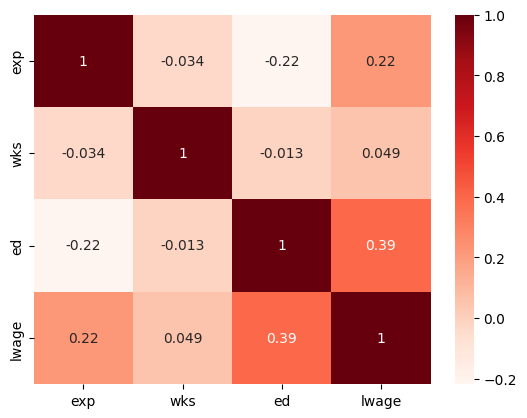

In [25]:
con_df = df_cleaned.loc[:,con_columns]
con_df.corr()
plt.figure()
sns.heatmap(con_df.corr(), annot=True, cmap='Reds')
plt.show()

Since the features that highly correlated to the target variables are the categoriccal features, therefore, we will only select these variables as the features

In [26]:
X = df_cleaned.loc[:,cat_columns] #features
y = df_cleaned['lwage'] # target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=7)

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge

# Steps for Linear Regression
step_std_lr = [('Standard Scaler', StandardScaler()),
           ('Linear Regression', LinearRegression())]

step_mm_lr = [('Min Max Scaler', MinMaxScaler()),
           ('Linear Regression', LinearRegression())]

# Steps for Ridge
step_std_r = [('Standard Scaler', StandardScaler()),
           ('Ridge Regression', Ridge())]

step_mm_r = [('Min Max Scaler', MinMaxScaler()),
           ('Ridge Regression', Ridge())]

pipeline_std_lr = Pipeline(step_std_lr)
pipeline_mm_lr = Pipeline(step_mm_lr)
pipeline_std_r = Pipeline(step_std_r)
pipeline_mm_r = Pipeline(step_mm_r)

pipelines = [pipeline_std_lr, pipeline_mm_lr, pipeline_std_r,
             pipeline_mm_r]

# fitting the data
for pipe in pipelines:
    pipe.fit(X_train, y_train)

pipe_dict = {0:'SS+Linear',
             1:'MM+Linear',
             2:'SS+Ridge',
             3:'MM+Ridge'}
best_accuracy = 0

# model evaluation
for i, model in enumerate(pipelines):
    print(model.score(X_test, y_test))
    if model.score(X_test, y_test) > best_accuracy:
        best_accuracy = model.score(X_test, y_test)
        best_pipeline = model
        best_scaler = pipe_dict[i]

print('The best model and scale approach for this dataset will be {} with accuracy of {}'.format(best_scaler, best_accuracy))

0.35023184831751886
0.3502318483175191
0.3502164379212981
0.350148983414471
The best model and scale approach for this dataset will be MM+Linear with accuracy of 0.3502318483175191


Since this is a regression problem (target variable is a continuous variable), so the models that were chosen are liner regression and ridge regression. I have built a machine learning pipeline where it autiomates the process of chosing the best scaler and ther best model. Due to time constraint, only linear regression model and ridge regression model were chosen to be trained on the data set.

The best model and scale approach for the dataset will be Min Max Scaler  and Linear Regression with accuracy of 0.35. The reason might be because of the data does not follow a linear pattern, which makes the linear regression may not perform well. We also can see that the features that have been selected are all binary variables, therefore tree-based regressor might be a better model to be trained on the data.

## Question 6
Find a way to classify this dataset into 3 homogenous groups.

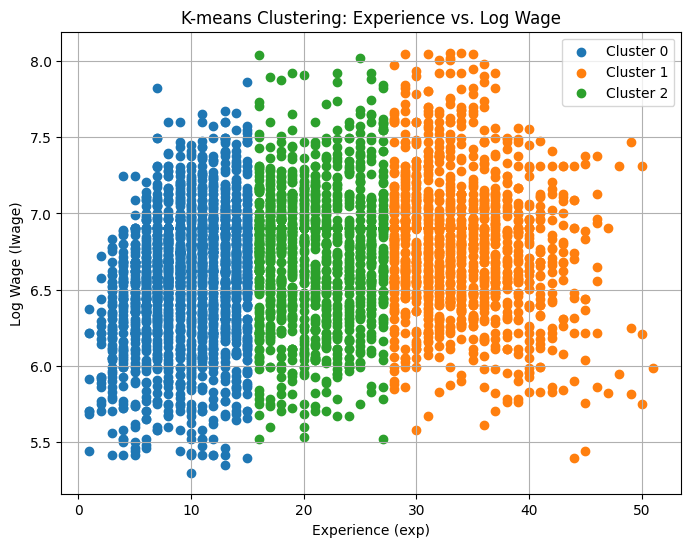

In [41]:
import pandas as pd
from sklearn.cluster import KMeans

# Select the relevant columns for clustering (e.g., 'exp' and 'lwage')
selected_columns = ['exp', 'lwage']
X = df_cleaned[selected_columns]

# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to your data
kmeans.fit(X)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels back to your original dataframe
df_cleaned['cluster'] = cluster_labels

import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
plt.figure(figsize=(8, 6))

# Scatter plot with different colors for each cluster
for cluster_num in range(3):
    cluster_data = df_cleaned[df_cleaned['cluster'] == cluster_num]
    plt.scatter(cluster_data['exp'], cluster_data['lwage'], label=f'Cluster {cluster_num}')

plt.xlabel('Experience (exp)')
plt.ylabel('Log Wage (lwage)')
plt.title('K-means Clustering: Experience vs. Log Wage')
plt.legend()
plt.grid(True)
plt.show()

## Question 7
Today we would like to sample some data from this dataset for further study.
What size of sample would you recommend?

**Answer:**
- The population of the dataset is 4165. With 95% confidence of interval and 5% margin of error, the size of the sample should be **352**

In [45]:
df.shape

(4165, 12)

## Question 8
How would you select & allocate these samples?

**Answer:**
- I would select and allocate these sample by using `Stratified Random Sampling techniques`.

## Question 9
Please explain why sampling is important and usually a preferred methodology.
What are the pros and cons of sampling?

**Answer:**
- Importance of Sampling:
  1. Collecting data from an entire population can be time-consuming, or even impossible. Sampling allows us to estimate population characteristics using a smaller subset.
  2. When populations are large, sampling provides a manageable dataset for analysis.
  3. Properly chosen samples can provide valid inferences about the entire population.

- Pros of Sampling:
  1. Sampling reduces costs associated with data collection.
  2. Gathering data from a sample is quicker than surveying the entire population.
  3. A well-designed sample can accurately represent the population's characteristics.
  4. Sampling can reduce bias compared to analyzing biased convenience samples.

- Cons of Sampling
  1. Due to randomness, sample estimates may differ from population values. Larger samples reduce this error.
  2. Poorly chosen sampling methods can introduce bias.
  3. Sometimes samples do not fully capture rare subgroups.

## Question 10
What are the important factors that would affect sampling results?

**Answer:**

Some of the import factors such as:
- Sampling size
- Sampling method
- Non-Response Bias